In [19]:
import random
import numpy as np

In [20]:
class Field:
    def __init__(self, size, item_pickup, item_dropoff, start_position):
        self.size = size
        self.item_pickup = item_pickup
        self.item_dropoff = item_dropoff
        self.position = start_position
        self.item_in_car = False
        
    def get_number_of_states(self):
        return self.size*self.size*self.size*self.size*2
        
        
    def get_state(self):
        state = self.position[0]*self.size*self.size*self.size*2
        state = state + self.position[1]*self.size*self.size*2
        state = state + self.item_pickup[0]*self.size*2
        state = state + self.item_pickup[1]*2
        
        if self.item_in_car:
            state = state + 1
        return state
        
    def make_action(self, action):
        (x,y) = self.position
        if action == 0: #down
            if y == self.size-1:
                return -10, False
            else:
                self.position = (x, y+1)
                return -1, False
            
        elif action == 1: #up
            if y == 0:
                return -10, False
            else:
                self.position = (x, y-1)
                return -1, False
            
        elif action == 2: #left
            if x == 0:
                return -10, False
            else:
                self.position = (x-1, y)
                return -1, False
                
        elif action == 3: #right
            if x == self.size-1:
                return -10, False
            else:
                self.position = (x+1, y)
                return -1, False
            
        elif action == 4: # pickup
            if self.item_in_car:
                return -10, False
            elif self.item_pickup != (x,y):
                return -10, False
            else:
                self.item_in_car = True
                return 20, False
                
        elif action == 5: #dropoff
            if not self.item_in_car:
                return -10, False
            elif self.item_dropoff != (x,y):
                self.item_pickup = (x,y)
                self.item_in_car = False
                return -10, False
            else:
                self.item_in_car = False
                return 20, True

In [21]:
size = 10
item_pickup = (0,0)
item_dropoff = (9,9)
start_position = (9,0)

field = Field(size, item_pickup, item_dropoff, start_position)

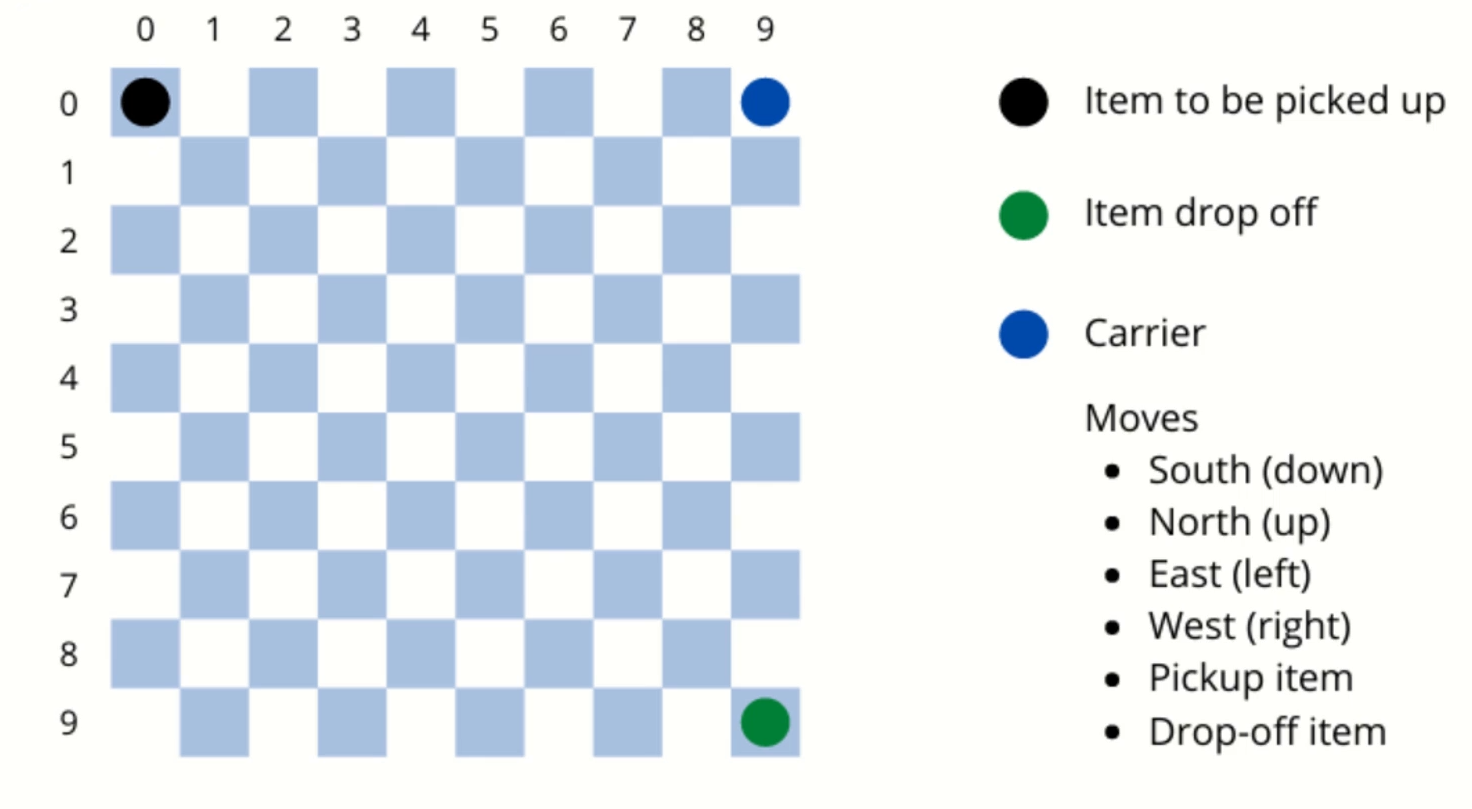

In [22]:
field.position

(9, 0)

In [23]:
# Random Solution
def random_solution():
    size = 10
    item_pickup = (0,0)
    item_dropoff = (9,9)
    start_position = (9,0)

    field = Field(size, item_pickup, item_dropoff, start_position)
    
    done = False
    steps = 0
    
    while not done:
        action = random.randint(0,5)
        reward, done = field.make_action(action)
        steps = steps + 1
        
    return steps
    

In [24]:
random_solution()

48982

In [25]:
run = [random_solution() for _ in range(100)]

In [26]:
print("Average number of steps taken by a random solution over 100 episodes:")
sum(run)/len(run)

Average number of steps taken by a random solution over 100 episodes:


179839.42

Q-Learning Algorithm

In [27]:
size = 10
item_pickup = (0,0)
item_dropoff = (9,9)
start_position = (9,0)

field = Field(size, item_pickup, item_dropoff, start_position)

number_of_states = field.get_number_of_states()
number_of_actions = 6

q_table = np.zeros((number_of_states, number_of_actions))

epsilon = 0.1
alpha = 0.1
gamma = 0.6

for _ in range(100000):
    field = Field(size, item_pickup, item_dropoff, start_position)
    done = False
    
    while not done:
        state = field.get_state()
        if random.uniform(0,1) < epsilon:
            action = random.randint(0,5) #Explore
        else:
            action = np.argmax(q_table[state]) #Exploit
            
        reward, done = field.make_action(action)
        
        new_state = field.get_state()
        new_state_max = np.max(q_table[new_state])
        
        q_table[state, action] = (1-alpha)*q_table[state, action]+alpha*(reward+gamma*new_state_max - q_table[state, action])
                        

In [28]:
def Qtable_solution():
    epsilon = 0.1
    alpha = 0.1
    gamma = 0.6
    
    field = Field(size, item_pickup, item_dropoff, start_position)
    done = False
    steps = 0
    
    while not done:
        state = field.get_state()
        if random.uniform(0,1) < epsilon:
            action = random.randint(0,5) #Explore
        else:
            action = np.argmax(q_table[state]) #Exploit
            
        reward, done = field.make_action(action)
        
        new_state = field.get_state()
        new_state_max = np.max(q_table[new_state])
        
        q_table[state, action] = (1-alpha)*q_table[state, action]+alpha*(reward+gamma*new_state_max - q_table[state, action])
                        
        steps = steps +1
        
    return steps

In [29]:
Qtable_solution()

33

In [30]:
run = [Qtable_solution() for _ in range(100)]

In [31]:
print("Average number of steps taken by the algorithm over 100 episodes:")
sum(run)/len(run)

Average number of steps taken by the algorithm over 100 episodes:


33.26